In [45]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [46]:
dataset_dir = 'data/leather_defect_classification/'
print(f"Dataset leather_defect_classification en {dataset_dir}")

Dataset leather_defect_classification en data/leather_defect_classification/


In [47]:
import os

paths = []
labels = []

for folder_path in glob(os.path.join(dataset_dir, '*')):
    if os.path.isdir(folder_path):
        class_label = os.path.basename(folder_path)
        labels.append(class_label)
        image_files = glob(os.path.join(folder_path, '*'))
        paths.extend(image_files)

print(f"Total imágenes: {len(paths)}")
print(f"Clases: {labels}")
print(labels)


Total imágenes: 3600
Clases: ['folding_marks', 'non_defective', 'growth_marks', 'grain_off', 'loose_grains', 'pinhole']
['folding_marks', 'non_defective', 'growth_marks', 'grain_off', 'loose_grains', 'pinhole']


In [48]:
image_paths = glob(os.path.join(dataset_dir, '*', '*'))  # matches all files in subfolders

## Dataframe creation

In [ ]:
print("Primeras 5 rutas de imagen:")
for path in image_paths[:5]:
    print(path)

Primeras 5 rutas de imagen:
data/leather_defect_classification/folding_marks/Folding marks 01 (132).jpg
data/leather_defect_classification/folding_marks/Folding marks 01 (582).jpg
data/leather_defect_classification/folding_marks/Folding marks 01 (440).jpg
data/leather_defect_classification/folding_marks/Folding marks 01 (594).jpg
data/leather_defect_classification/folding_marks/Folding marks 01 (42).jpg


In [ ]:
def extraer_desde_palabra(texto, palabra):
    # Encontrar la posición de la palabra
    posicion = texto.find(palabra)

    # Verificar si la palabra fue encontrada
    if posicion != -1:
        # Extraer desde la palabra hasta el final
        return texto[posicion:]
    else:
        return "La palabra no fue encontrada."

In [ ]:
leather_anomalies = pd.DataFrame(columns=['label', 'filename', 'path'])
dataframes = []
for d in image_paths:

    resultado = extraer_desde_palabra(d, 'data')
    #info = resultado.split('/')
    info = resultado.replace('\\', '/').split('/')
    print(f"[DEBUG] resultado: {resultado}, info: {info}")

    label = info[2]
    group = info[3]
    filename = info[-1]

    temp_df = pd.DataFrame([{
        'label': label,
        #'group': group,
        'filename': filename,
        'path': d
    }])

    dataframes.append(temp_df)

leather_anomalies = pd.concat(dataframes, ignore_index=True)

[DEBUG] resultado: data/leather_defect_classification\folding_marks\Folding marks 01 (1).jpg, info: ['data', 'leather_defect_classification', 'folding_marks', 'Folding marks 01 (1).jpg']
[DEBUG] resultado: data/leather_defect_classification\folding_marks\Folding marks 01 (10).jpg, info: ['data', 'leather_defect_classification', 'folding_marks', 'Folding marks 01 (10).jpg']
[DEBUG] resultado: data/leather_defect_classification\folding_marks\Folding marks 01 (100).jpg, info: ['data', 'leather_defect_classification', 'folding_marks', 'Folding marks 01 (100).jpg']
[DEBUG] resultado: data/leather_defect_classification\folding_marks\Folding marks 01 (101).jpg, info: ['data', 'leather_defect_classification', 'folding_marks', 'Folding marks 01 (101).jpg']
[DEBUG] resultado: data/leather_defect_classification\folding_marks\Folding marks 01 (102).jpg, info: ['data', 'leather_defect_classification', 'folding_marks', 'Folding marks 01 (102).jpg']
[DEBUG] resultado: data/leather_defect_classificati

In [46]:
leather_anomalies.head()

,label,filename,path
0,folding_marks,Folding marks 01 (1).jpg,data/leather_defect_classification\folding_mar...
1,folding_marks,Folding marks 01 (10).jpg,data/leather_defect_classification\folding_mar...
2,folding_marks,Folding marks 01 (100).jpg,data/leather_defect_classification\folding_mar...
3,folding_marks,Folding marks 01 (101).jpg,data/leather_defect_classification\folding_mar...
4,folding_marks,Folding marks 01 (102).jpg,data/leather_defect_classification\folding_mar...


### EDA

In [ ]:
# Number of images by class
leather_anomalies['label'].value_counts()

label
folding_marks    600
grain_off        600
growth_marks     600
loose_grains     600
non_defective    600
pinhole          600
Name: count, dtype: int64

### Class distribution

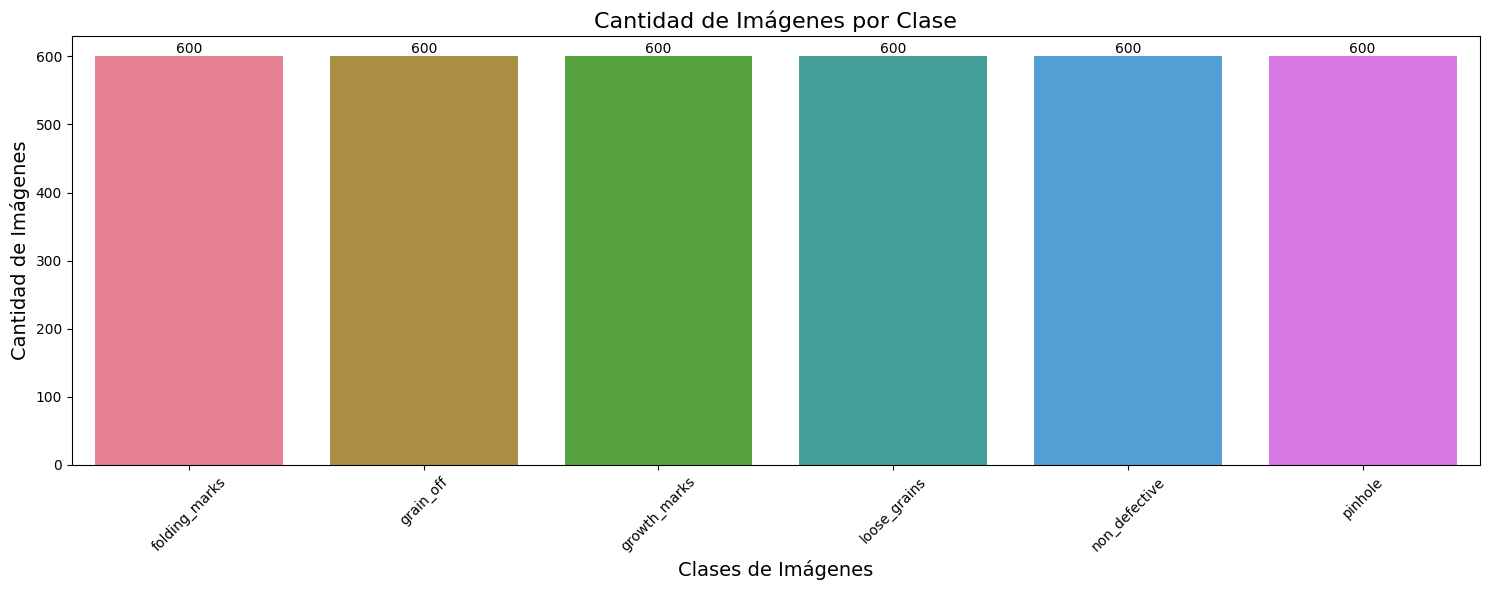

In [ ]:
# Grafico de barras de la cantidad de imagenes por clase incluyendo la mascara
# Contar las imágenes por clase
counts = leather_anomalies['label'].value_counts()
classes = counts.index
values = counts.values

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
colors = sns.color_palette("husl", len(classes))  # Colores diferentes para cada barra

# Crear el gráfico de barras
#bar_plot = sns.barplot(x=classes, y=values, palette=colors)
bar_plot = sns.barplot(x=classes, y=values, hue=classes, palette=colors)

# Agregar la cantidad encima de cada barra
for index, value in enumerate(values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Etiquetas de los ejes y título
plt.xlabel('Clases de Imágenes', fontsize=14)
plt.ylabel('Cantidad de Imágenes', fontsize=14)
plt.title('Cantidad de Imágenes por Clase', fontsize=16)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()  # Ajustar el layout
plt.show()

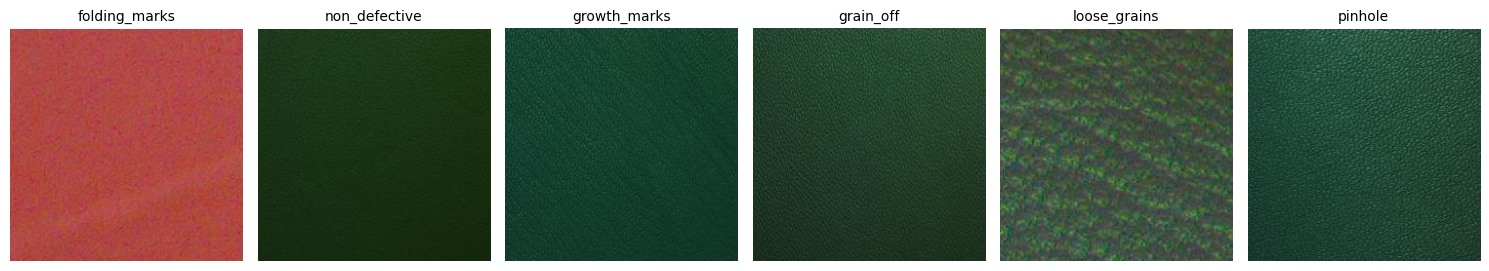

In [50]:
# Mostrar una imagen aleatoria por cada clase
labels = df['label'].unique()
fig, axs = plt.subplots(1, len(labels), figsize=(15, 3))

for ax, label in zip(axs, labels):
    sample = df[df['label'] == label].sample(1, random_state=1).iloc[0]
    img_path = sample['image_path']
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"{label}", fontsize=10)

plt.tight_layout()
plt.show()